# Customer segmentation using Unsupervised learning

## Project Goal

Use unsupervised machine learning algorithms such as k-means and PCA (principal component analysis) to look at customer data from a bank and divide the data into atleast 3 distinct groups so that the bank can target their marketing to a specific group of customers

Data source:  https://www.kaggle.com/arjunbhasin2013/ccdata

In **bank marketing** jargon there are different kinds of customers which have the following broad characteristics
1. Transactors - Just use the credit card for transactions and do not overspend and have the least amount of interest charges
2. Revolvers - Use the credit card to buy expensive stuff on pay high amount of interest and are extremely valuabl for the bank
3. Prime - High earners with high credit limit and high spending habits
4. New customers - no available information on spending styles but target them to use more credit services

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('./marketing_data.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Data dictionary 

1. CUSTID: Identification of Credit Card holder
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.loc[df['ONEOFF_PURCHASES'] == df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
df.loc[df['CASH_ADVANCE'] == df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## EDA (data cleaning and preparation)

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.loc[df.isna().any(axis = 1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [10]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Impute all missing values of minimum payment with the average value

In [11]:
mean_minimum_payments = df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(mean_minimum_payments)


In [12]:
df.loc[df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].quantile(0.25))

In [14]:
df.isna().sum().sum()

0

In [15]:
df.duplicated().sum()

0

The data has been cleaned and all missing values are imputed and duplicates are checked for and dropped if necessary

In [16]:
df = df.drop('CUST_ID', axis = 1)

In [17]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


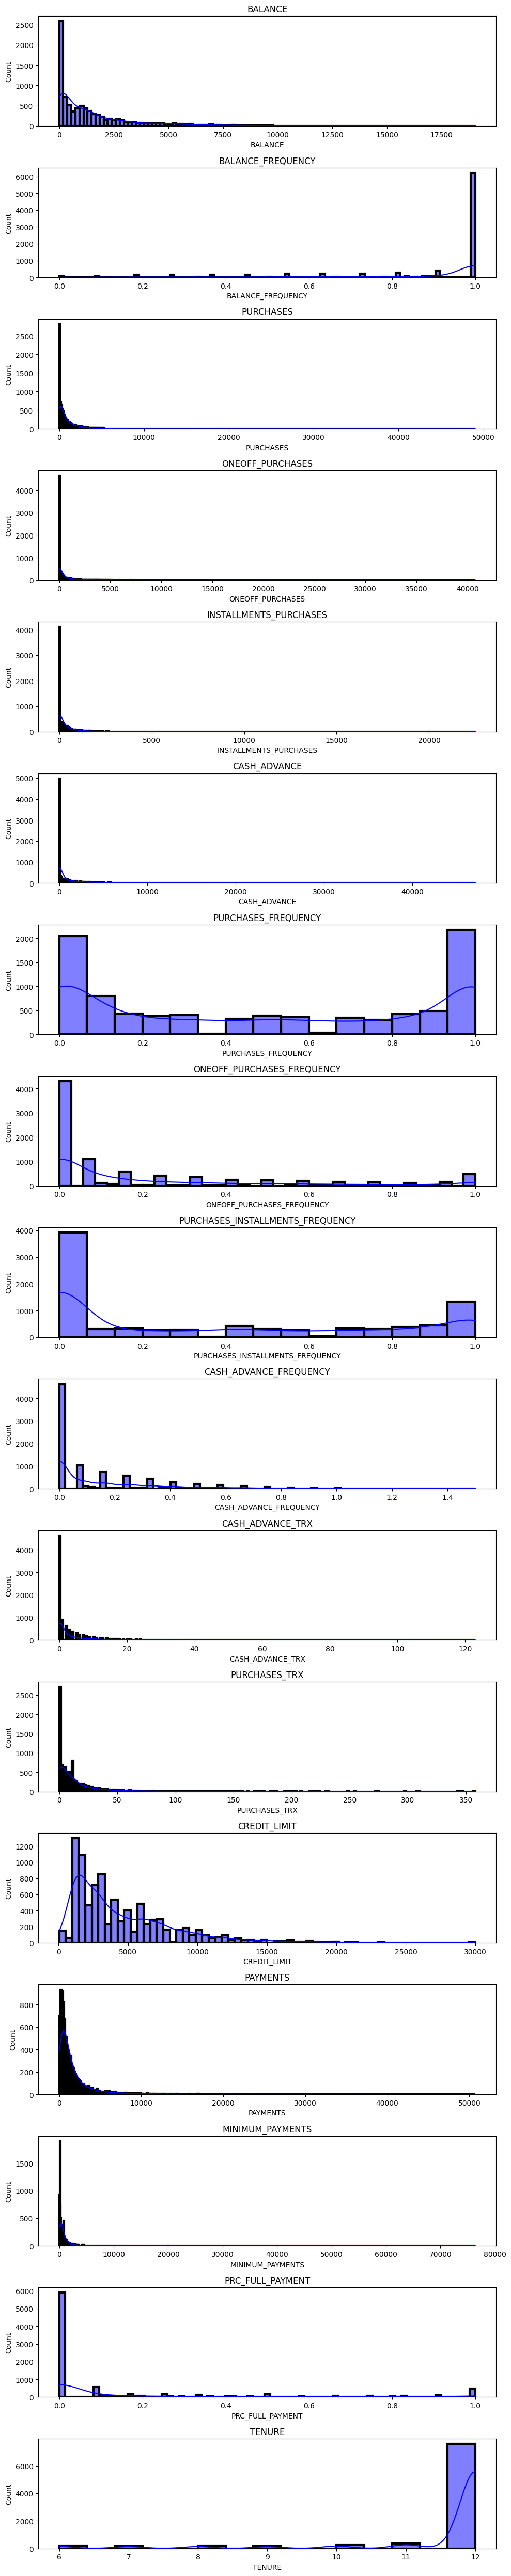

In [18]:
plt.figure(figsize=(10, 50))
for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    sns.histplot(df[column], kde=True, color="b", linewidth=3)
    plt.title(column)
plt.tight_layout()
plt.show()


In [19]:
corr_mat = df.corr()
corr_mat 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531314,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.096058,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356988,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319742,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256527,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.304005,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119883,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295080,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060832,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132597,0.183192,0.097898,-0.249773,-0.133372


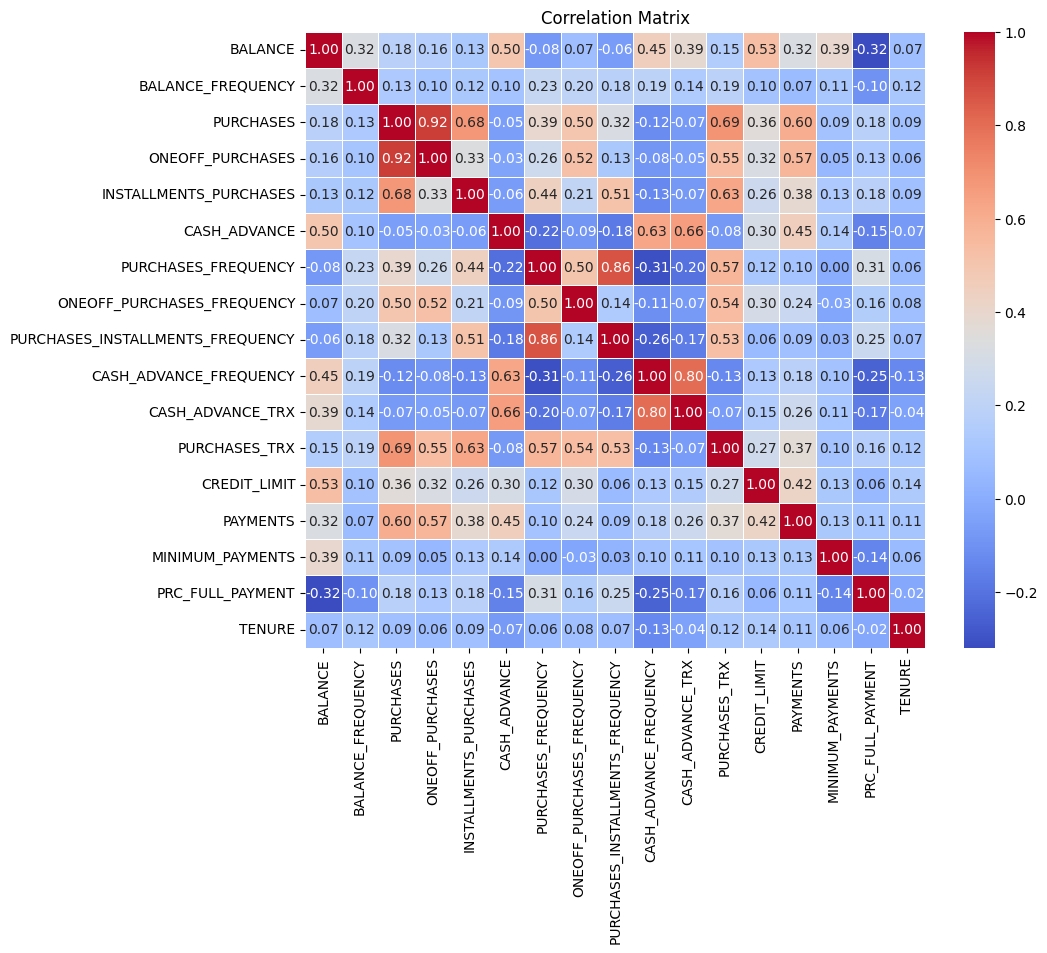

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## K Means Clustering 

In K means clustering there is no direct measure of performance and to decide on the optimal number of clusters one uses
1. Inertia - Within cluster sum of squares and then see at what K do we have an elbow
2. Silhouette Score - Measures how similar an object is to its own cluster compared to other clusters

In [21]:
# scale the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
df_scaled[:,5]

array([-0.46678555,  2.60560451, -0.46678555, ..., -0.46678555,
       -0.4493521 , -0.40620512])

In [23]:
# elbow method

inertia_list = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, n_init=10);
    kmeans.fit(df_scaled);
    inertia_list.append(kmeans.inertia_);

C:\Users\nihal\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nihal\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


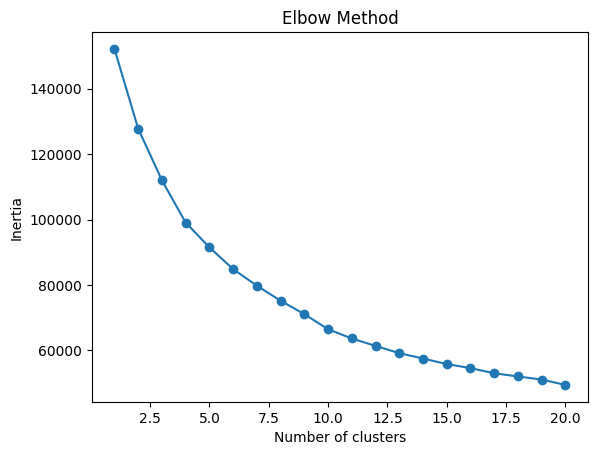

In [24]:
# Plotting the elbow curve
plt.plot(range(1, 21), inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.savefig('./elbow_k.pdf')
plt.show()

In [25]:
for i, inert in enumerate(inertia_list):
    print(f'num_clusters = {i}, inertial = {round(inert)}')

num_clusters = 0, inertial = 152150
num_clusters = 1, inertial = 127785
num_clusters = 2, inertial = 111986
num_clusters = 3, inertial = 99074
num_clusters = 4, inertial = 91502
num_clusters = 5, inertial = 84850
num_clusters = 6, inertial = 79760
num_clusters = 7, inertial = 75190
num_clusters = 8, inertial = 71074
num_clusters = 9, inertial = 66460
num_clusters = 10, inertial = 63633
num_clusters = 11, inertial = 61365
num_clusters = 12, inertial = 59152
num_clusters = 13, inertial = 57503
num_clusters = 14, inertial = 55821
num_clusters = 15, inertial = 54571
num_clusters = 16, inertial = 53006
num_clusters = 17, inertial = 52019
num_clusters = 18, inertial = 51079
num_clusters = 19, inertial = 49435


Around **12 clusters** seem to be the optimal number for the clustering from the Elbow method

In [26]:
np.round(inertia_list)

array([152150., 127785., 111986.,  99074.,  91502.,  84850.,  79760.,
        75190.,  71074.,  66460.,  63633.,  61365.,  59152.,  57503.,
        55821.,  54571.,  53006.,  52019.,  51079.,  49435.])

In [27]:
percentage_decrease = []

for i in range(1, len(inertia_list)):
    decrease = inertia_list[i-1] - inertia_list[i]
    percentage = (decrease / inertia_list[i-1]) * 100
    percentage_decrease.append(percentage)

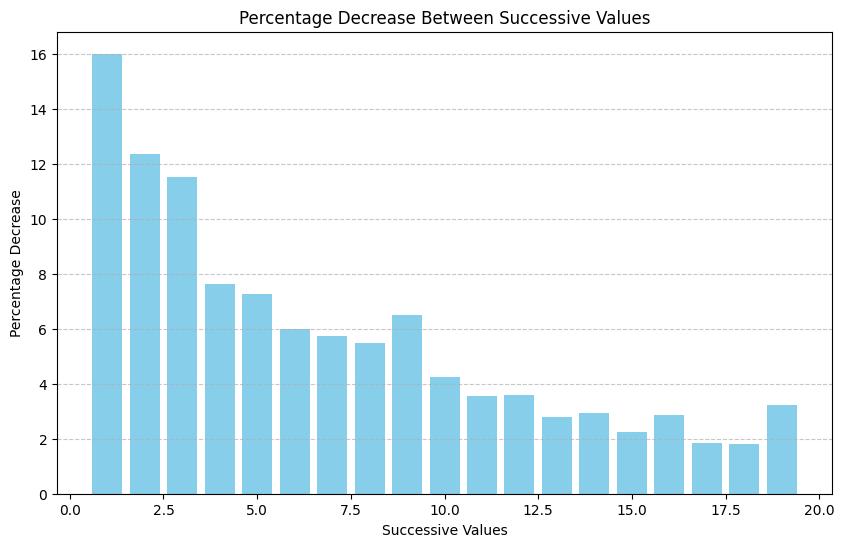

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(percentage_decrease) + 1), percentage_decrease, color='skyblue')
plt.xlabel('Successive Values')
plt.ylabel('Percentage Decrease')
plt.title('Percentage Decrease Between Successive Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# Fitting to 12 clusters
kmeans = KMeans(12, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [30]:
kmeans.cluster_centers_.shape

(12, 17)

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.222510,0.368814,-0.017998,-0.194909,0.315471,-0.325259,0.976044,-0.280611,1.176039,-0.397325,-0.315669,0.227744,-0.284088,-0.186823,-0.018100,-0.337041,0.281742
1,0.471431,0.374109,-0.336446,-0.238854,-0.356774,0.942504,-0.728961,-0.317559,-0.645149,1.966458,1.651349,-0.401788,0.035776,0.114380,0.036897,-0.390259,0.034574
2,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004875,-0.129901,11.641856,-0.525551,0.298409
3,-0.177645,0.406610,0.559446,0.707388,0.023052,-0.342868,1.005017,2.024210,0.120866,-0.432879,-0.347851,0.635954,0.438384,0.139971,-0.170819,0.465131,0.272590
4,1.009975,0.470981,2.523186,1.904765,2.466864,-0.192459,1.166571,1.636500,1.263095,-0.307608,-0.196242,3.143031,1.281483,1.405016,0.367936,0.235089,0.336716
5,-0.088861,0.392225,-0.351534,-0.234343,-0.400523,-0.197912,-0.837899,-0.374288,-0.757630,-0.102706,-0.179697,-0.478471,-0.353352,-0.281966,-0.077333,-0.451818,0.279699
6,-0.705357,0.040398,-0.024451,-0.261642,0.422277,-0.456245,0.865988,-0.414398,1.029504,-0.655562,-0.466315,0.085965,-0.123652,-0.227168,-0.291299,2.146845,0.109797
7,-0.699059,-2.247210,-0.320957,-0.233673,-0.329433,-0.308738,-0.607512,-0.446180,-0.483020,-0.507611,-0.370991,-0.432035,-0.184005,-0.200904,-0.250503,0.109715,0.193928
8,-0.346922,-0.374154,-0.291409,-0.211375,-0.300281,0.040195,-0.214540,-0.278030,-0.243451,0.251701,-0.038240,-0.391964,-0.579294,-0.403826,-0.211000,-0.051907,-3.253792
9,1.824289,0.297743,0.151502,0.115154,0.146253,5.287116,-0.173570,0.070894,-0.108276,2.596694,4.365251,0.170665,1.494316,3.948002,0.560814,-0.108011,0.022984


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1101.339416,0.964639,964.751633,268.928477,696.344413,296.788229,0.882084,0.118746,0.831825,0.055635,1.094621,20.370706,3460.462041,1192.309965,822.025883,0.055136,11.894362
1,2545.719025,0.965894,284.382637,195.987992,88.441124,2955.345783,0.197783,0.107724,0.108039,0.528652,14.518072,4.722892,4624.297189,2064.263936,950.192581,0.039571,11.563588
2,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667
3,1194.721863,0.973593,2198.468913,1766.556006,431.912907,259.861411,0.893713,0.806319,0.412473,0.048521,0.875000,30.517276,6089.204545,2138.346261,466.120949,0.289758,11.882114
4,3666.653340,0.988842,6394.030787,3753.957609,2641.822449,575.275273,0.958552,0.690657,0.866424,0.073589,1.909621,92.833819,9156.851312,5800.526317,1721.665692,0.222474,11.967930
5,1379.518348,0.970185,252.146056,203.476311,48.880064,563.841321,0.154061,0.090800,0.063336,0.114592,2.022524,2.816830,3208.443122,916.879412,683.984761,0.021566,11.891628
6,96.334025,0.886841,950.964124,158.165181,792.927713,22.104470,0.837913,0.078835,0.773588,0.003960,0.066570,16.846599,4044.214577,1075.516048,185.347212,0.781630,11.664255
7,109.442259,0.344927,317.476256,204.587460,113.165920,331.432078,0.246527,0.069354,0.172473,0.033566,0.717087,3.971055,3824.616661,1151.547395,280.420285,0.185805,11.776844
8,842.385667,0.788637,380.605650,241.598007,139.527574,1063.161436,0.404245,0.119516,0.267684,0.185512,2.987868,4.967071,2386.343154,564.106911,372.480242,0.138533,7.162912
9,5361.577787,0.947803,1326.891827,783.569231,543.322596,12066.201359,0.420689,0.223607,0.321406,0.654769,33.038462,18.951923,9931.250000,13162.223643,2171.159379,0.122123,11.548077


In [33]:
cluster_centers.sort_values(by=('BALANCE',), inplace=True)
cluster_centers.reset_index(drop=True, inplace=True)


In [34]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,96.334025,0.886841,950.964124,158.165181,792.927713,22.104470,0.837913,0.078835,0.773588,0.003960,0.066570,16.846599,4044.214577,1075.516048,185.347212,0.781630,11.664255
1,109.442259,0.344927,317.476256,204.587460,113.165920,331.432078,0.246527,0.069354,0.172473,0.033566,0.717087,3.971055,3824.616661,1151.547395,280.420285,0.185805,11.776844
2,842.385667,0.788637,380.605650,241.598007,139.527574,1063.161436,0.404245,0.119516,0.267684,0.185512,2.987868,4.967071,2386.343154,564.106911,372.480242,0.138533,7.162912
3,1101.339416,0.964639,964.751633,268.928477,696.344413,296.788229,0.882084,0.118746,0.831825,0.055635,1.094621,20.370706,3460.462041,1192.309965,822.025883,0.055136,11.894362
4,1194.721863,0.973593,2198.468913,1766.556006,431.912907,259.861411,0.893713,0.806319,0.412473,0.048521,0.875000,30.517276,6089.204545,2138.346261,466.120949,0.289758,11.882114
5,1379.518348,0.970185,252.146056,203.476311,48.880064,563.841321,0.154061,0.090800,0.063336,0.114592,2.022524,2.816830,3208.443122,916.879412,683.984761,0.021566,11.891628
6,2545.719025,0.965894,284.382637,195.987992,88.441124,2955.345783,0.197783,0.107724,0.108039,0.528652,14.518072,4.722892,4624.297189,2064.263936,950.192581,0.039571,11.563588
7,3666.653340,0.988842,6394.030787,3753.957609,2641.822449,575.275273,0.958552,0.690657,0.866424,0.073589,1.909621,92.833819,9156.851312,5800.526317,1721.665692,0.222474,11.967930
8,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,0.000000,11.916667
9,5361.577787,0.947803,1326.891827,783.569231,543.322596,12066.201359,0.420689,0.223607,0.321406,0.654769,33.038462,18.951923,9931.250000,13162.223643,2171.159379,0.122123,11.548077


In [35]:
labels

array([ 5, 10,  3, ...,  8,  8,  8])

In [36]:
label_kmeans = kmeans.fit_predict(df_scaled)

label_kmeans[:12]

array([ 2,  3, 10,  2,  2,  5,  7,  5,  2,  4,  5,  2])

In [37]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

df_cluster.cluster.value_counts(normalize=True)

cluster
5     0.262905
0     0.172402
7     0.119665
3     0.109944
1     0.083464
6     0.077207
8     0.064469
10    0.053296
4     0.038324
9     0.011620
2     0.004022
11    0.002682
Name: proportion, dtype: float64

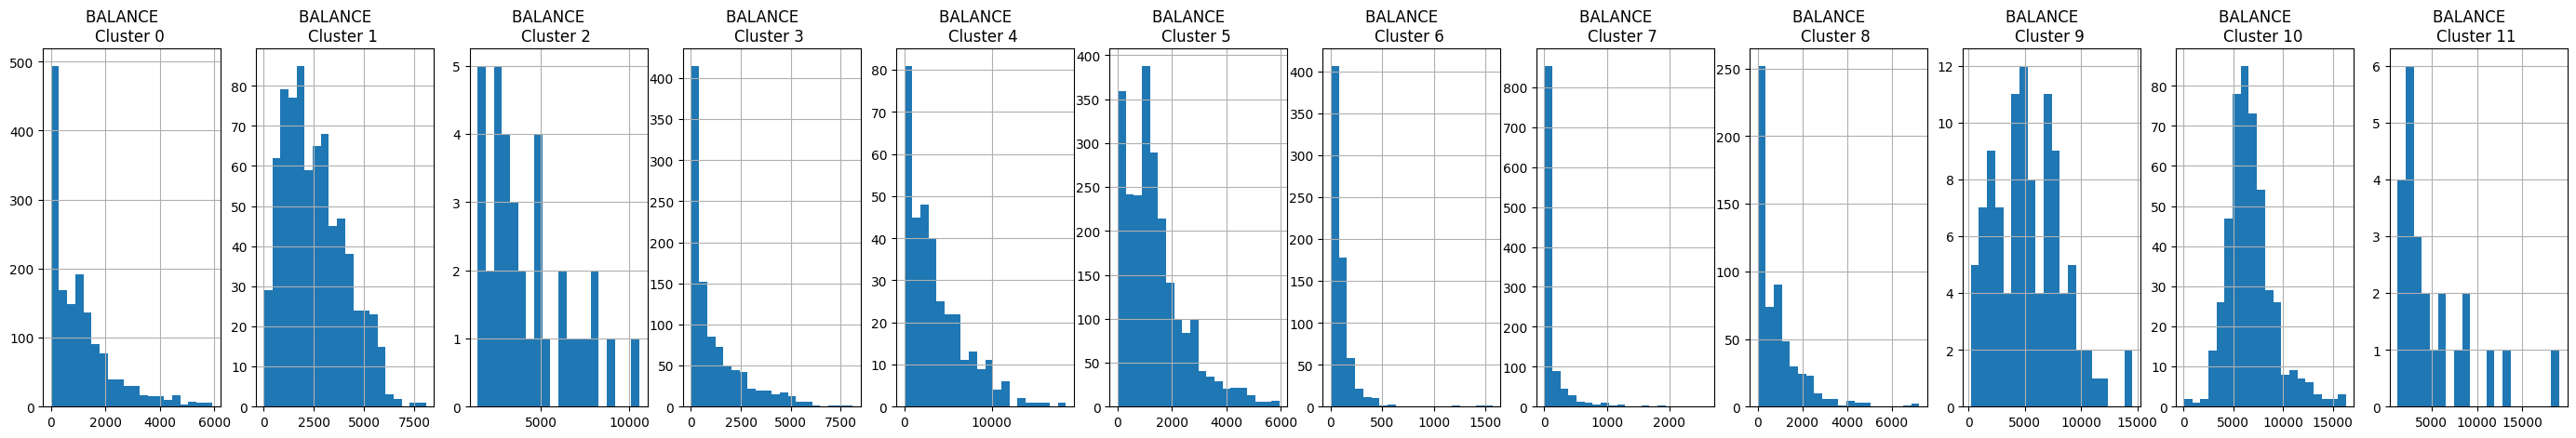

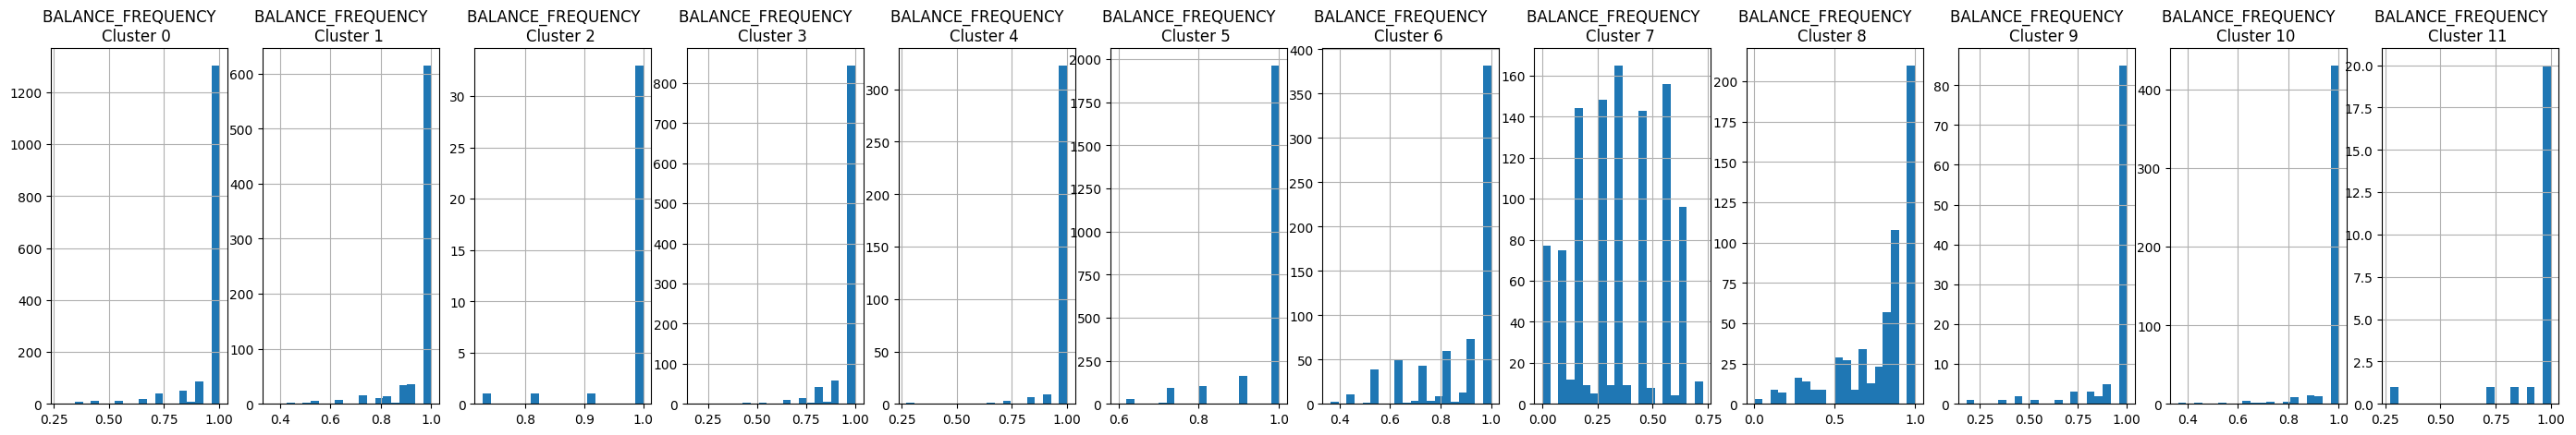

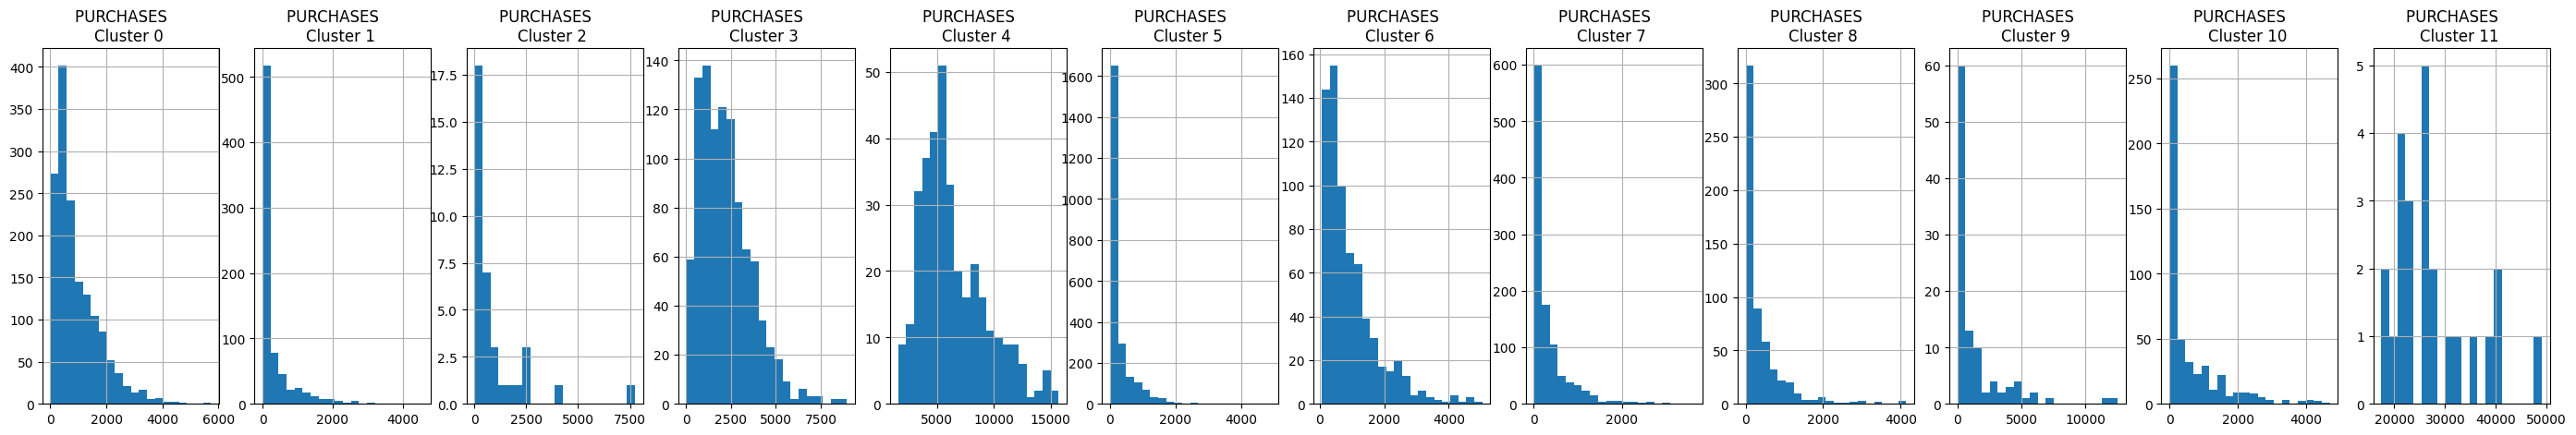

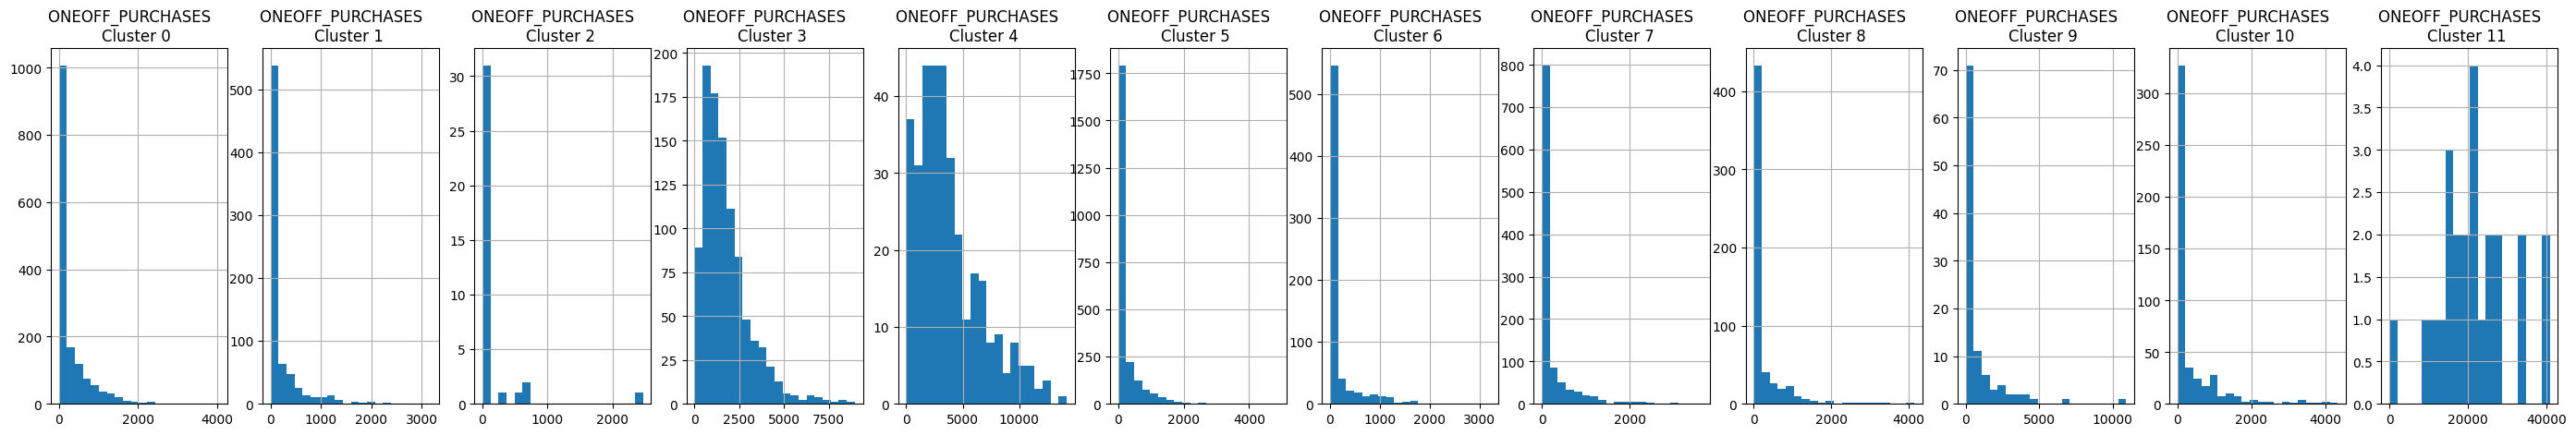

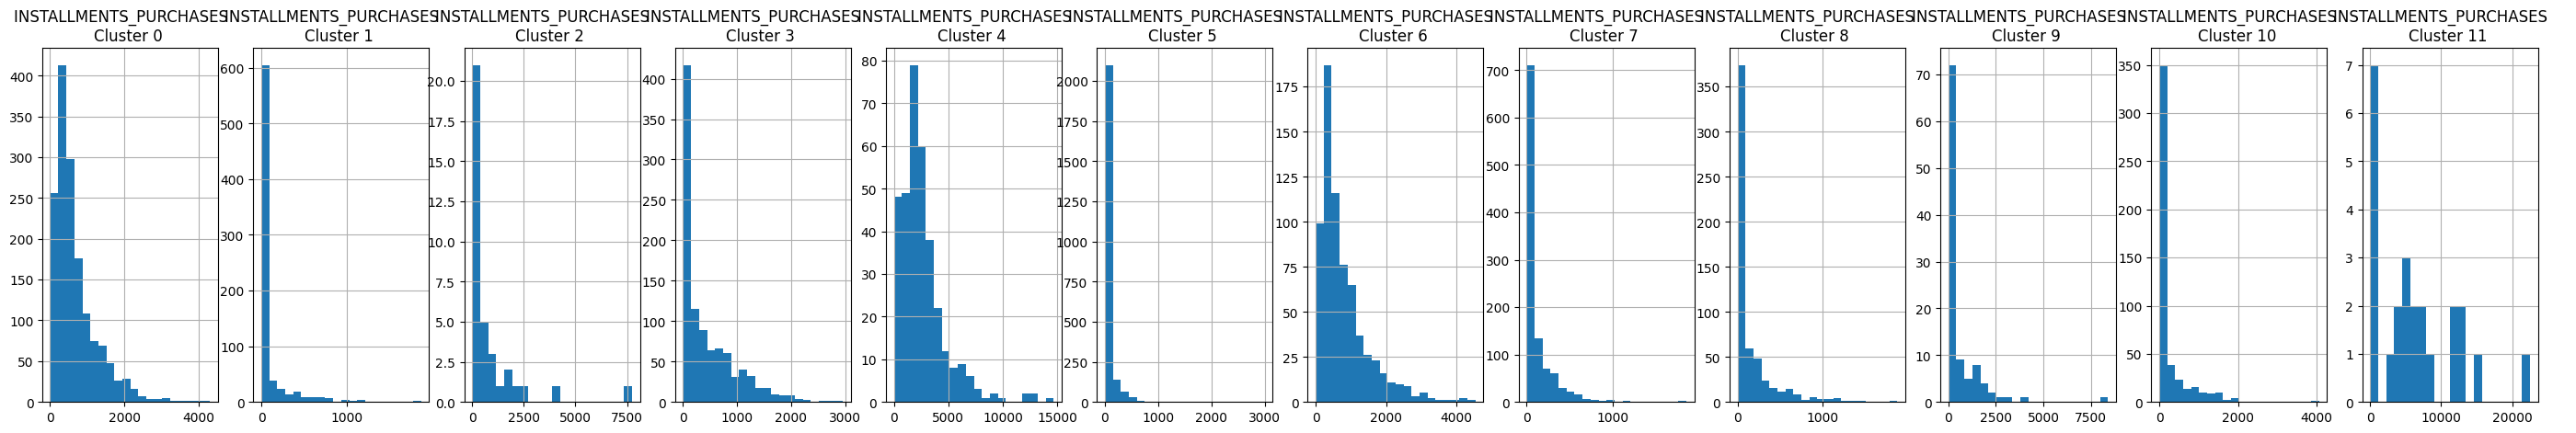

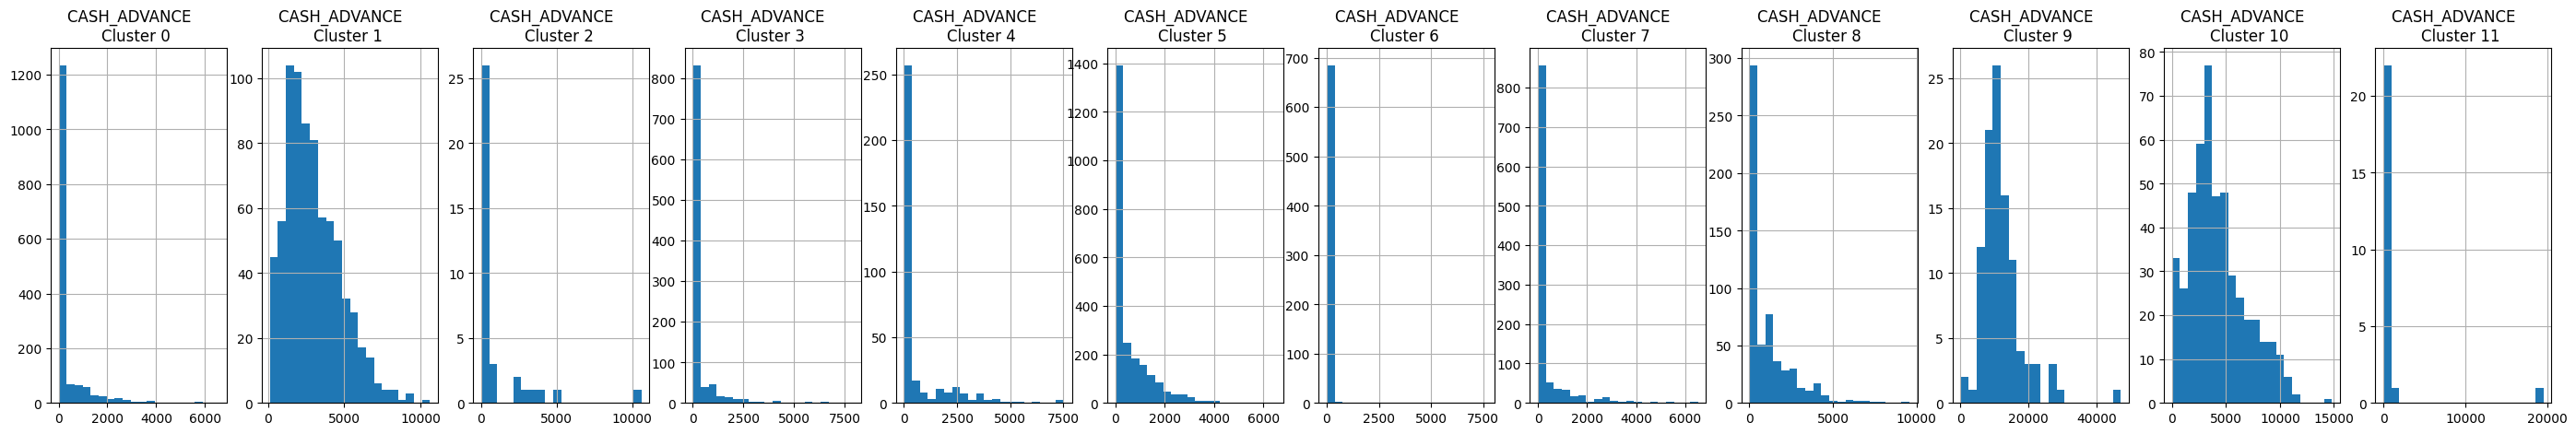

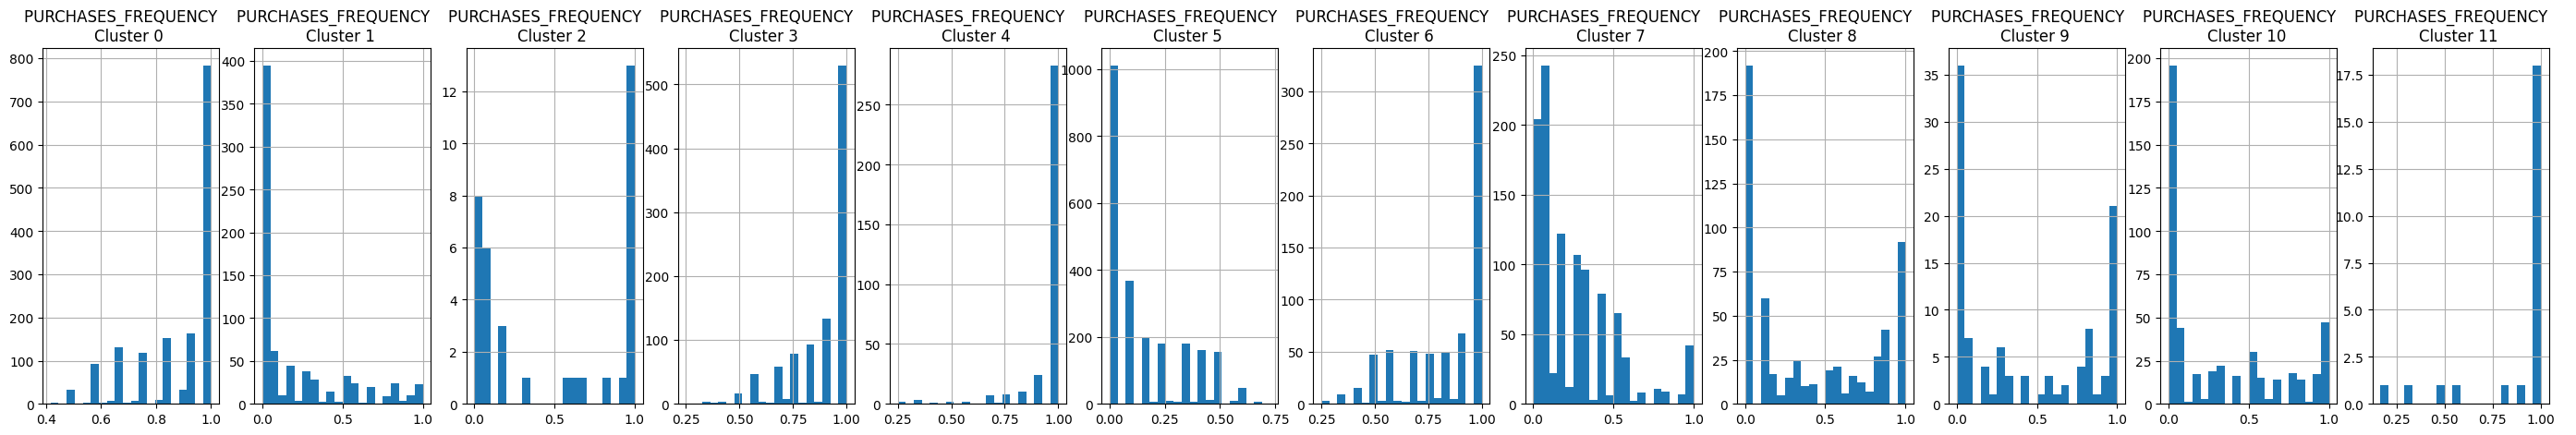

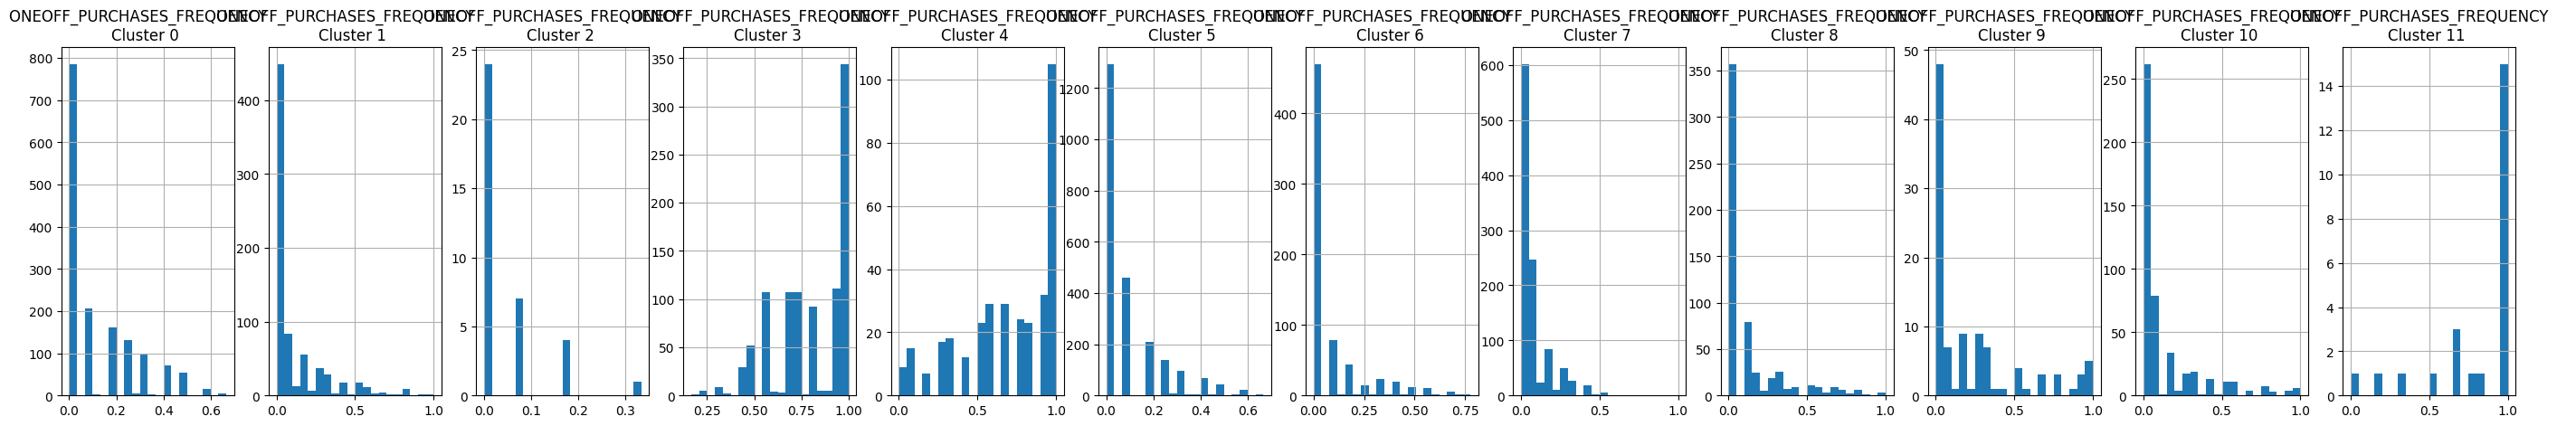

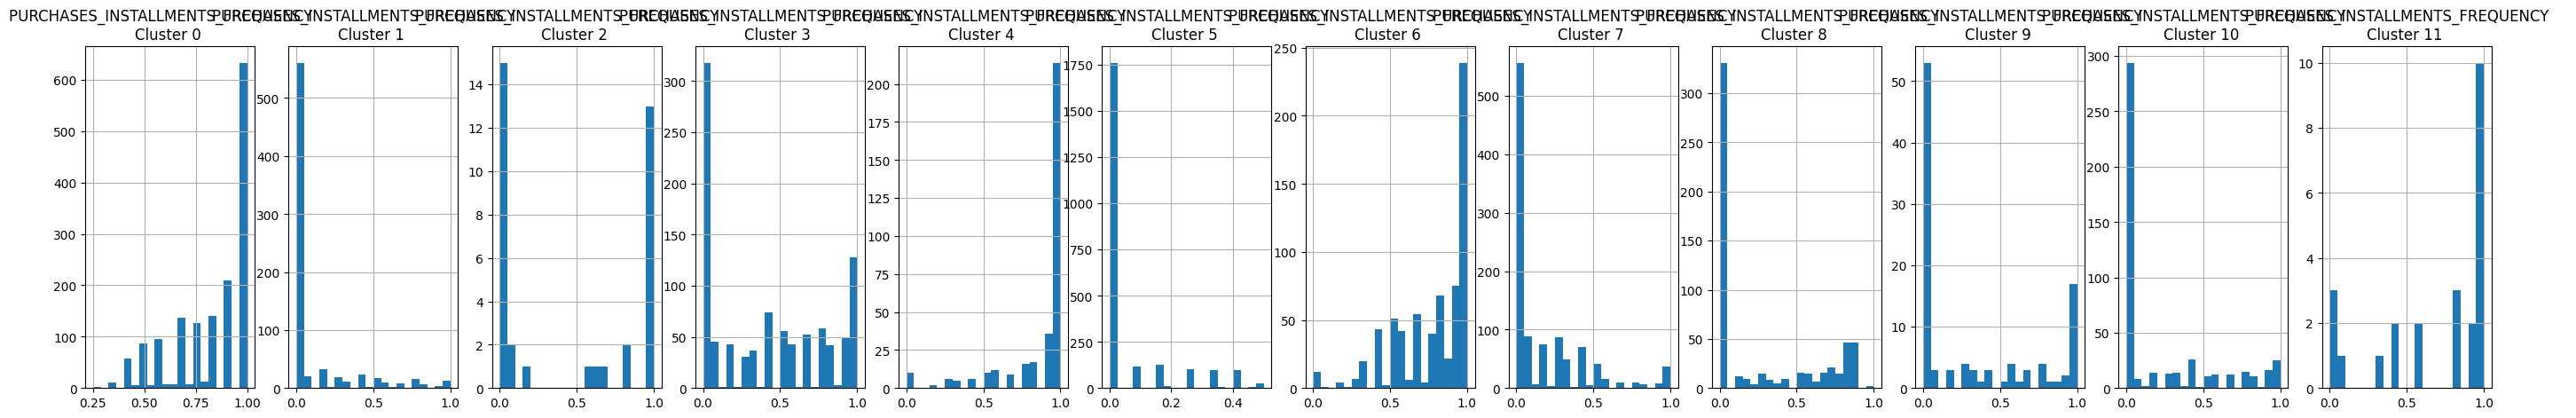

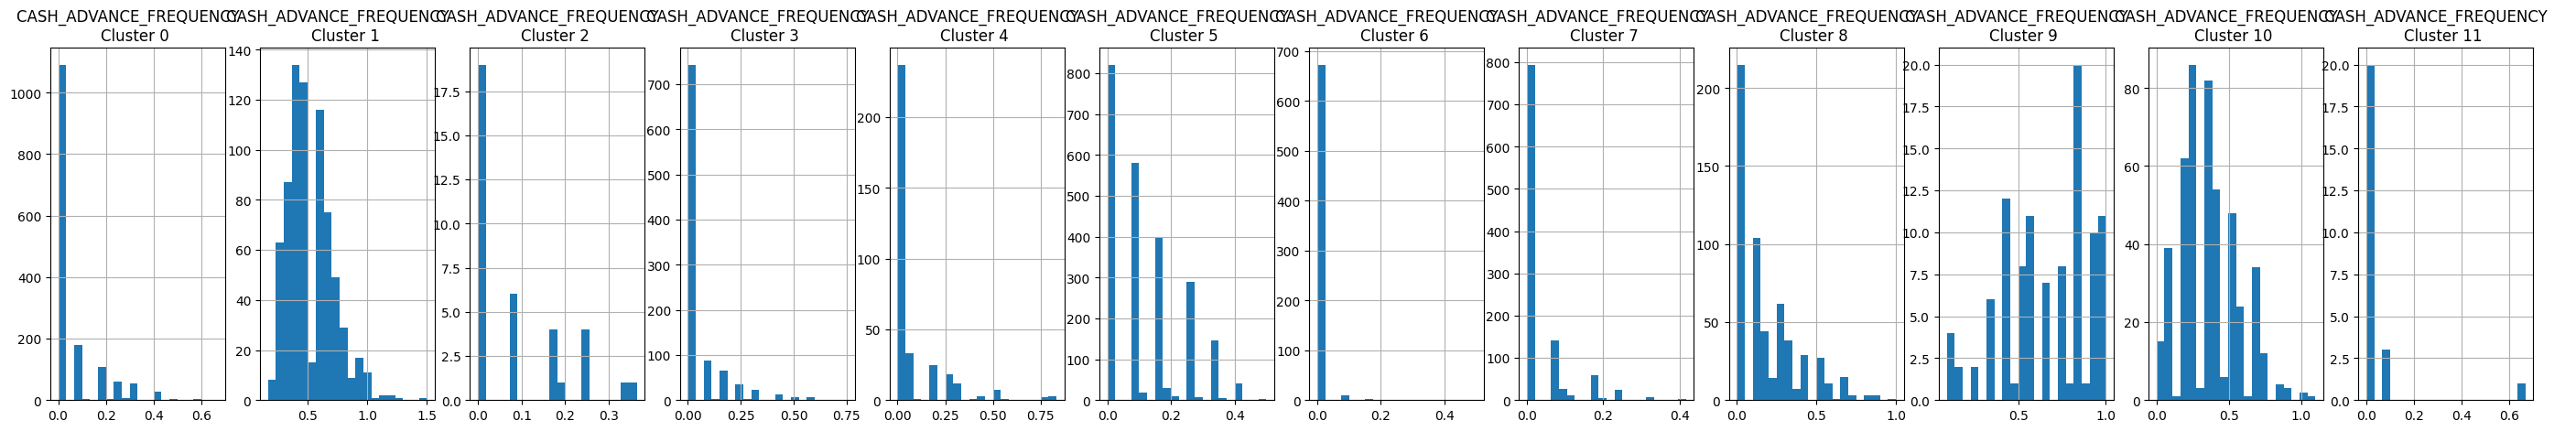

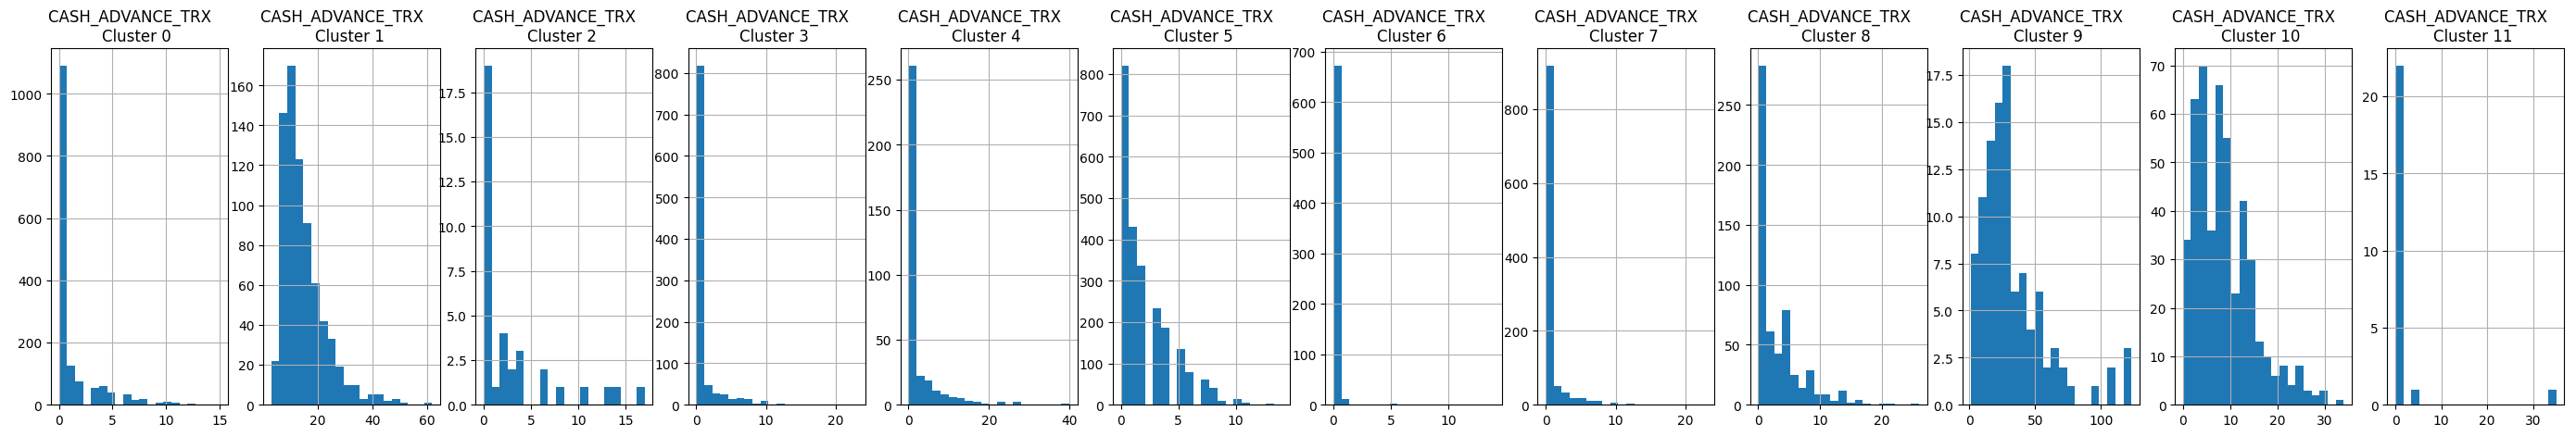

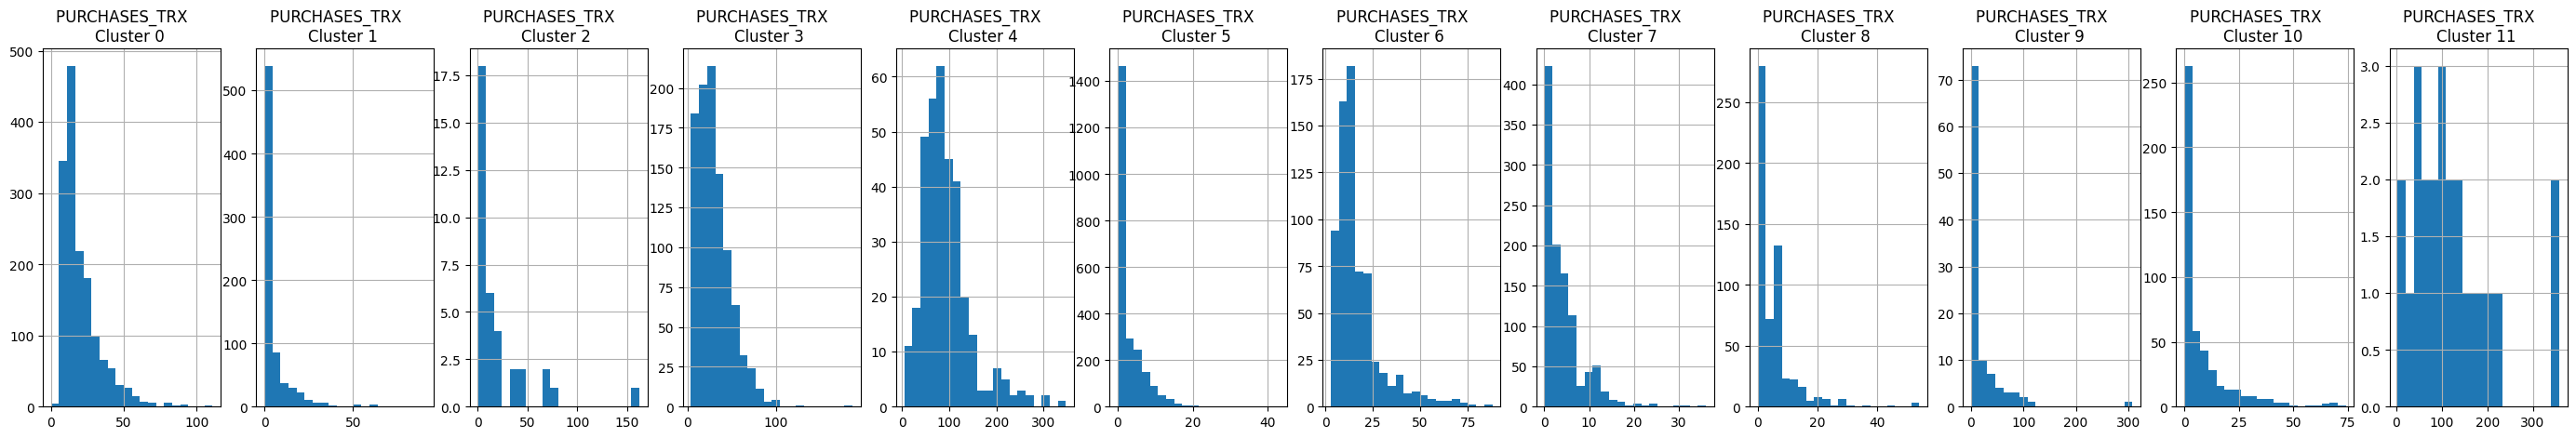

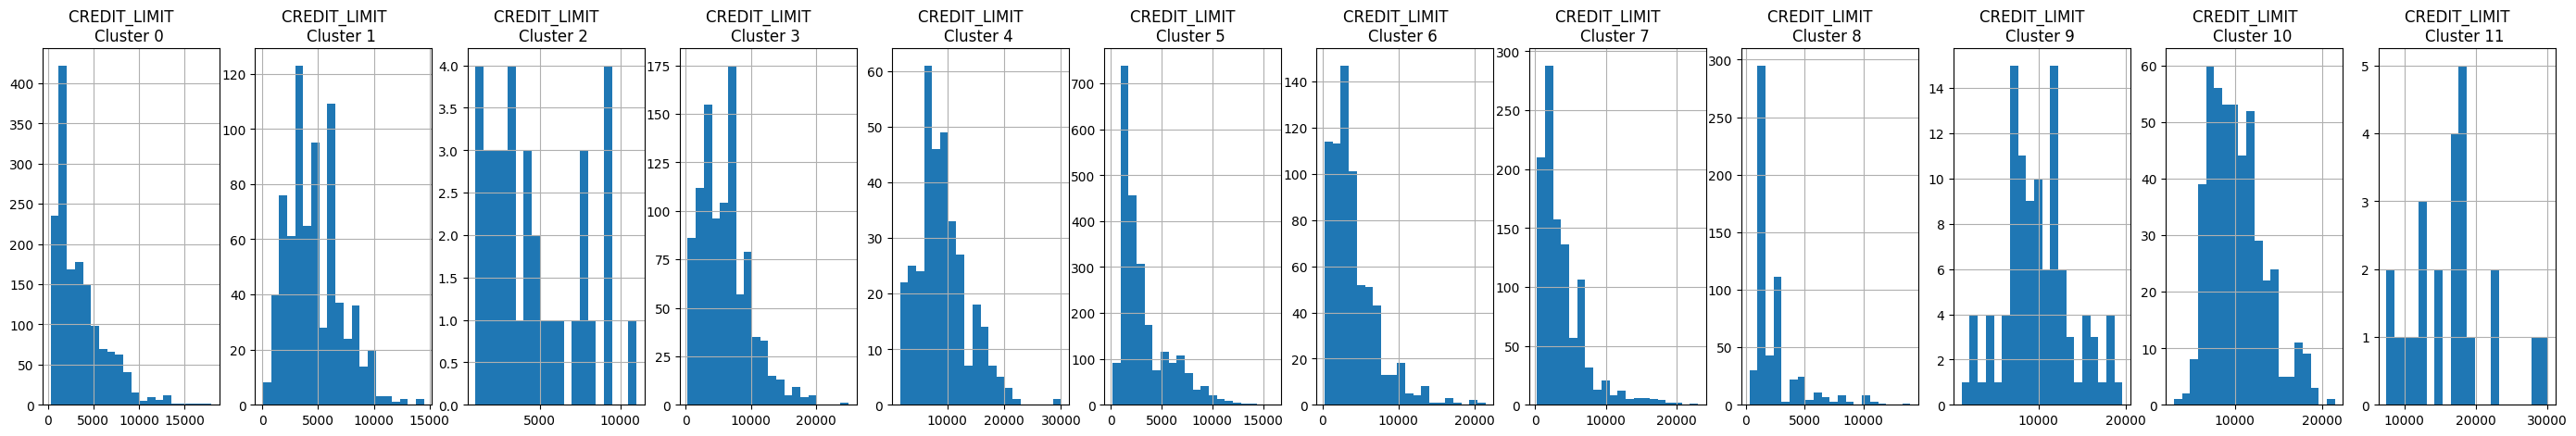

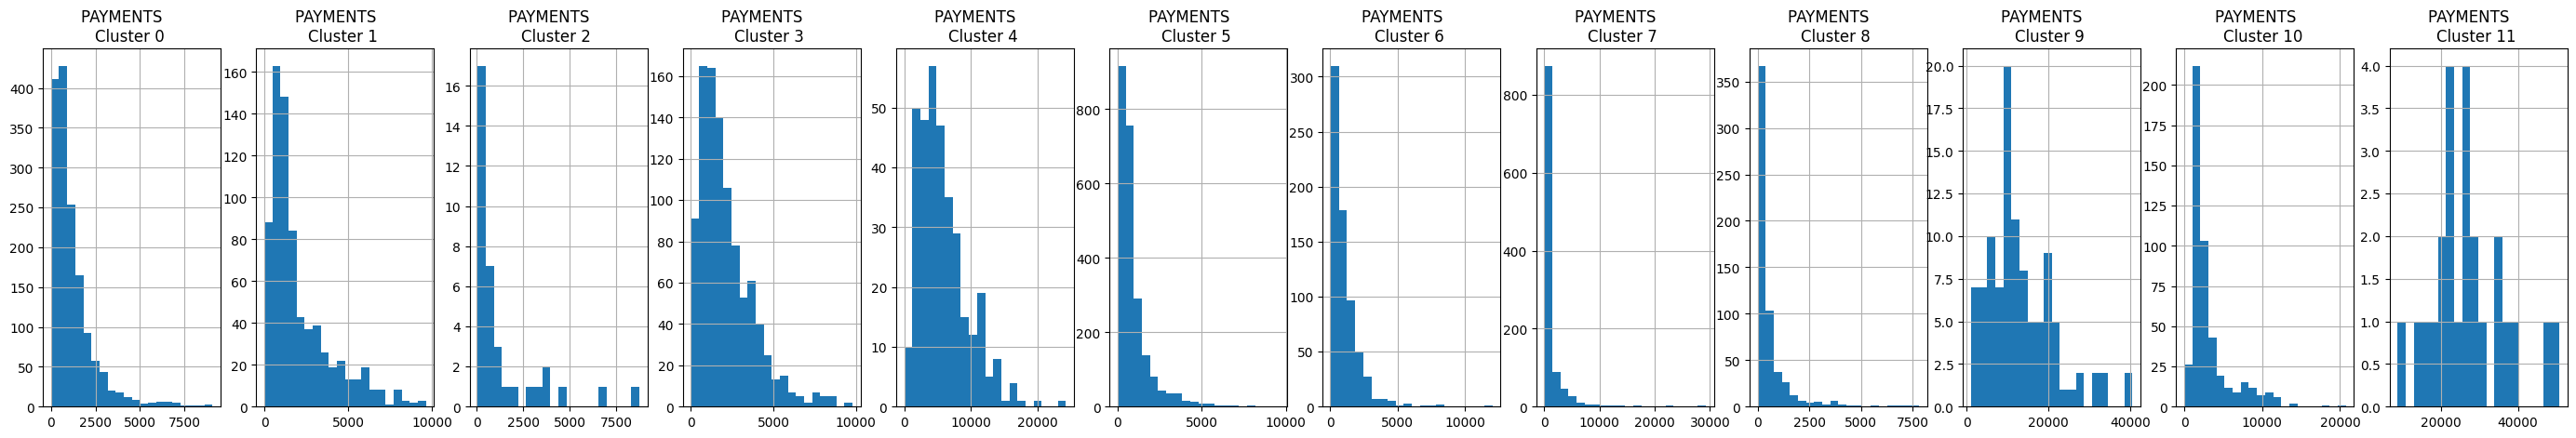

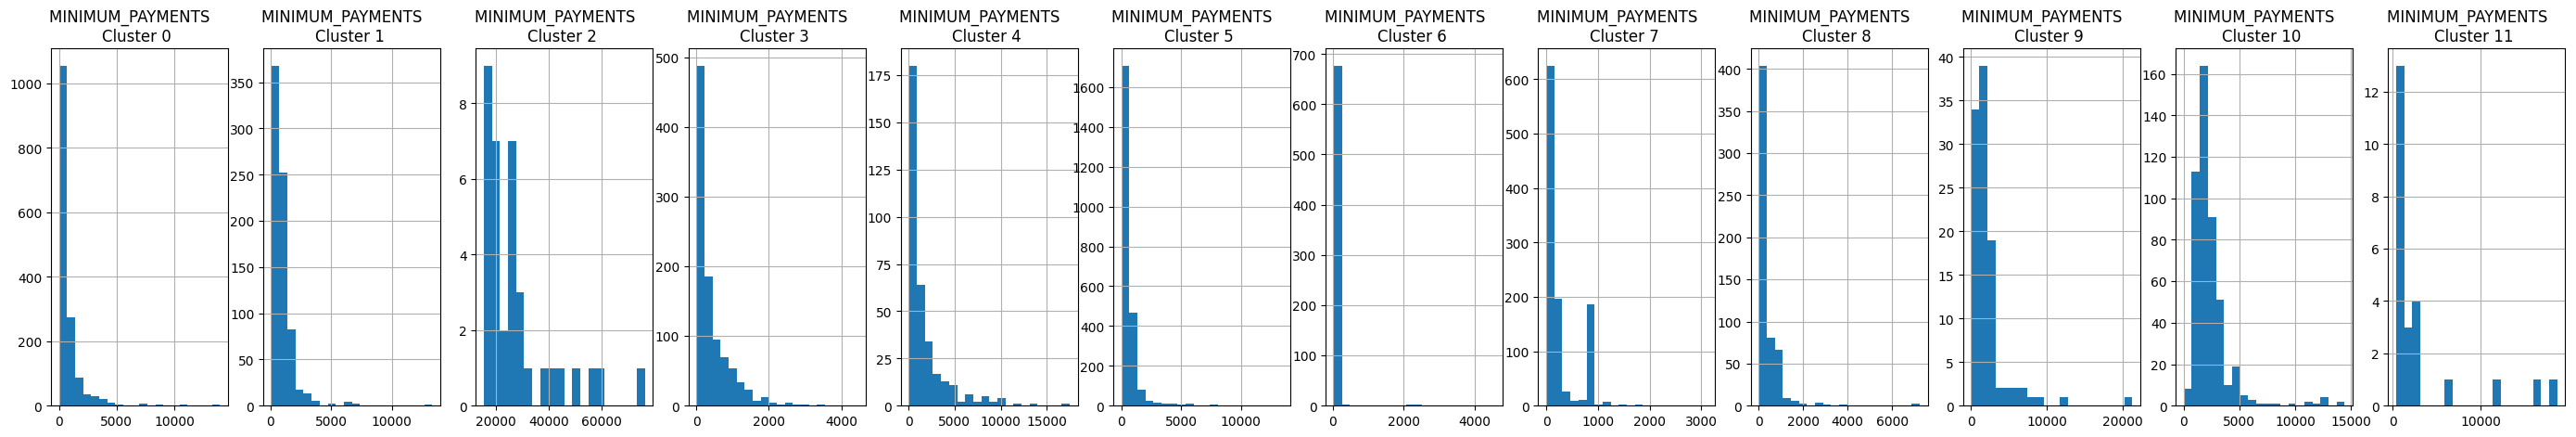

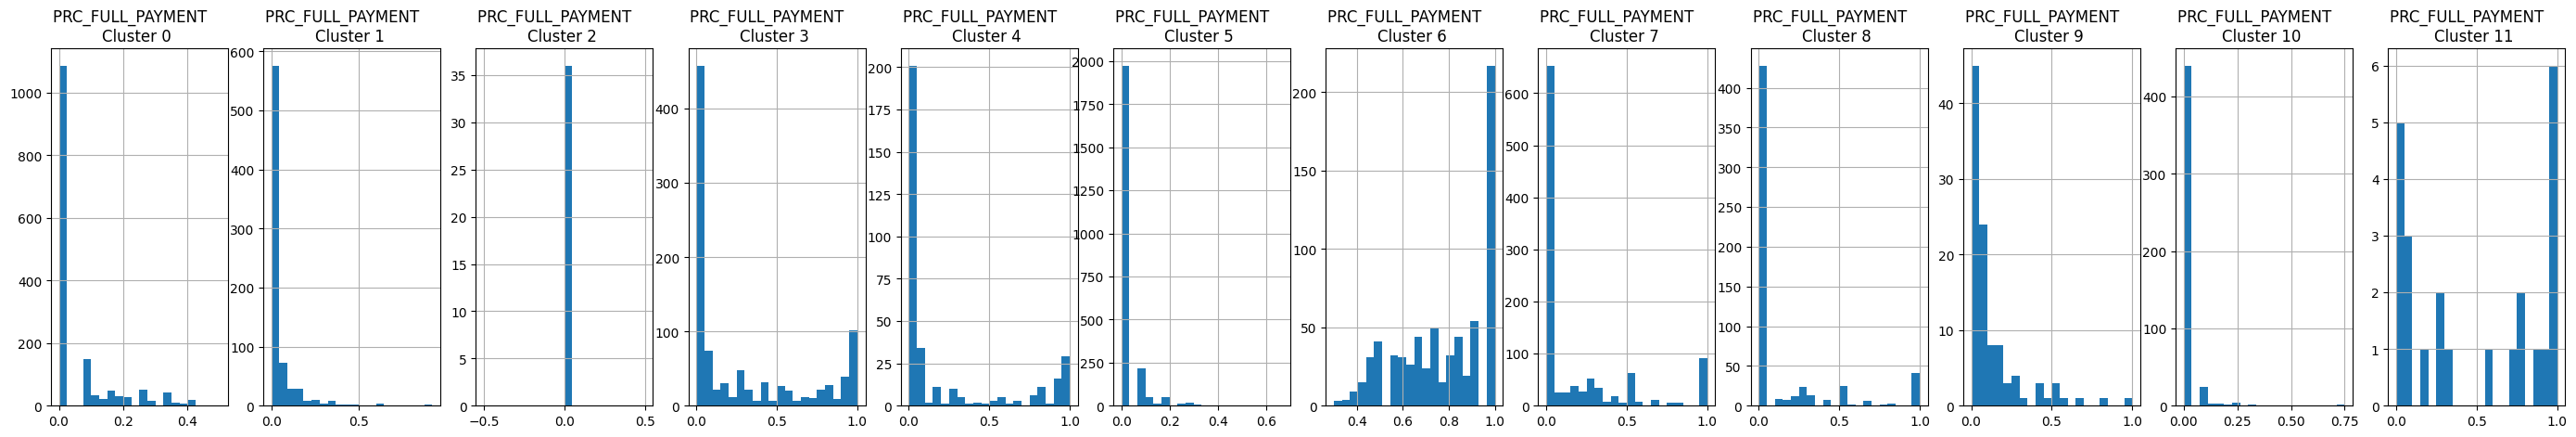

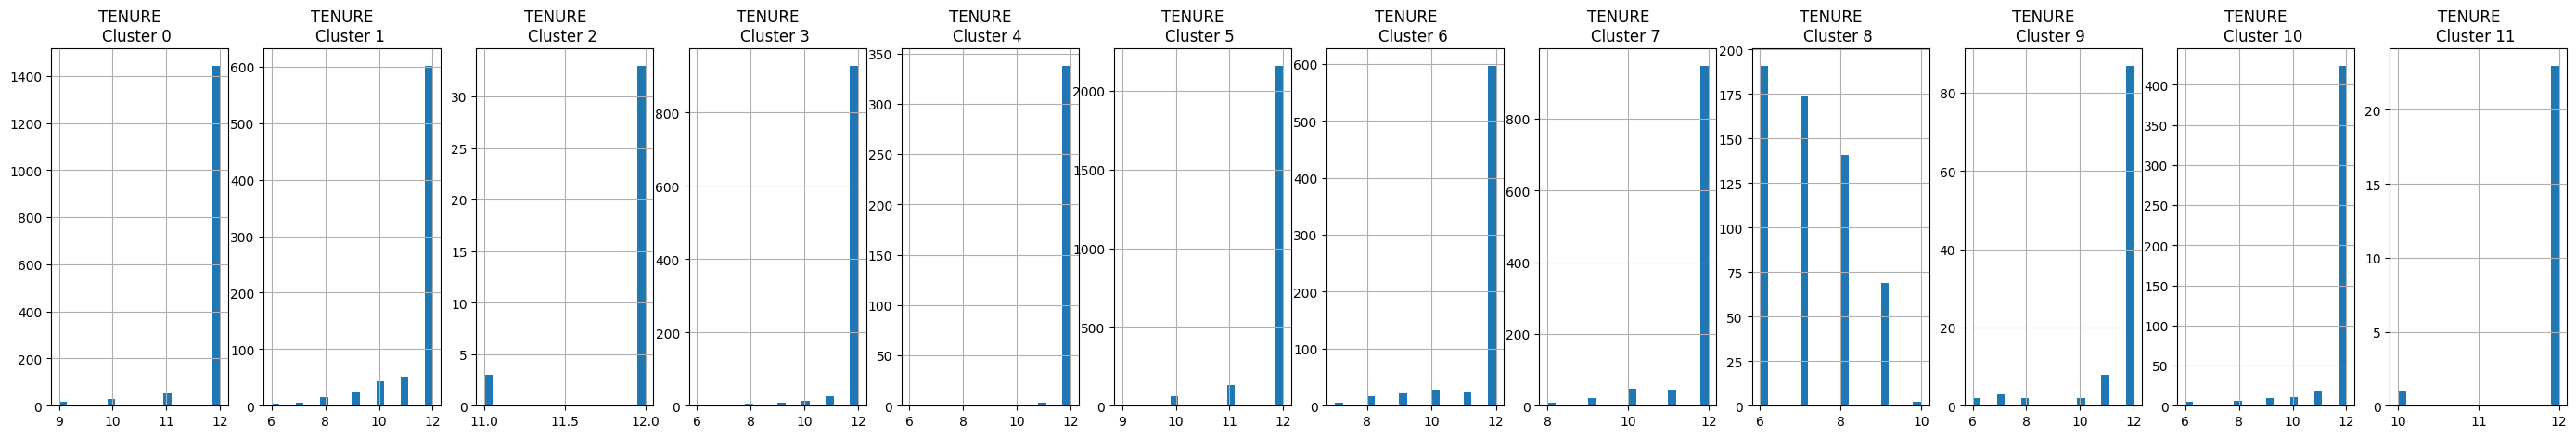

In [38]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(12):
    plt.subplot(1,12,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## PCA and dimensionality reduction

In [39]:
pca = PCA(n_components=2)
pca_1 = pca.fit_transform(df_scaled)

pca_1

array([[-1.68225508, -1.07633831],
       [-1.13813207,  2.50656849],
       [ 0.96972593, -0.38353541],
       ...,
       [-0.92635895, -1.81084249],
       [-2.33666804, -0.65797934],
       [-0.55655682, -0.40059964]])

In [40]:
pca_df = pd.DataFrame(data = pca_1, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682255,-1.076338
1,-1.138132,2.506568
2,0.969726,-0.383535
3,-0.873575,0.043202
4,-1.599443,-0.688453


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682255,-1.076338,5
1,-1.138132,2.506568,10
2,0.969726,-0.383535,3
3,-0.873575,0.043202,5
4,-1.599443,-0.688453,5


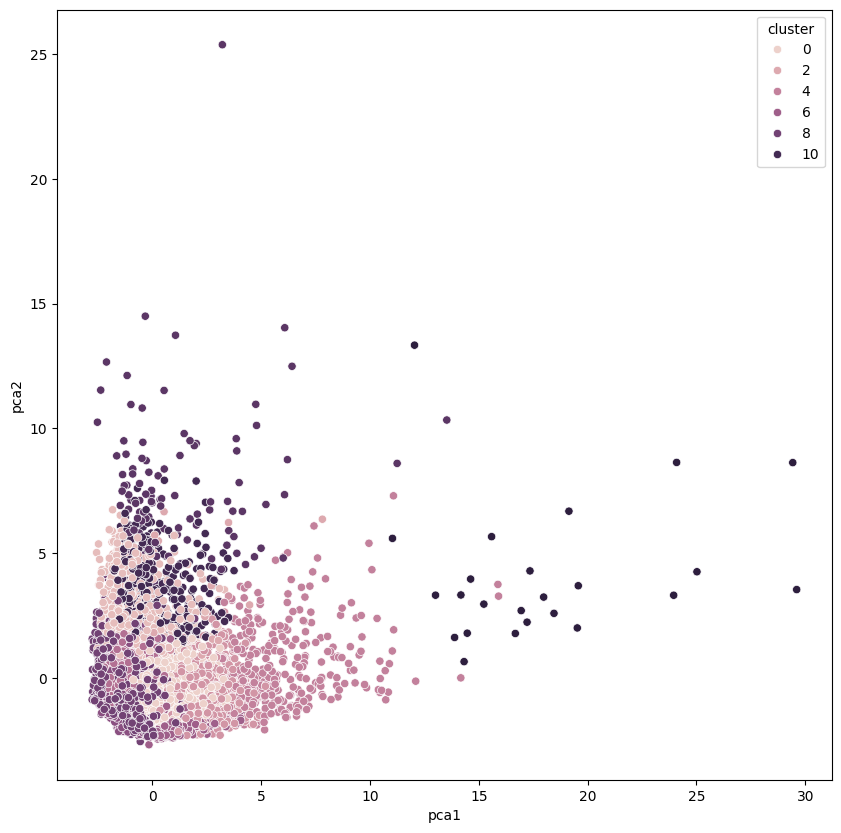

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df)

plt.savefig('./pca_diff.pdf')
plt.show()

## Summary

1. Using Elbow method we find that the optimal number of clusters is 12
2. We applied K means to find the customer segmentation
3. We find the 4 customer groups as mentioned in the bank marketing jargon